<a href="https://colab.research.google.com/github/anto-richard/TSA_EXP10/blob/main/TSA_exp10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

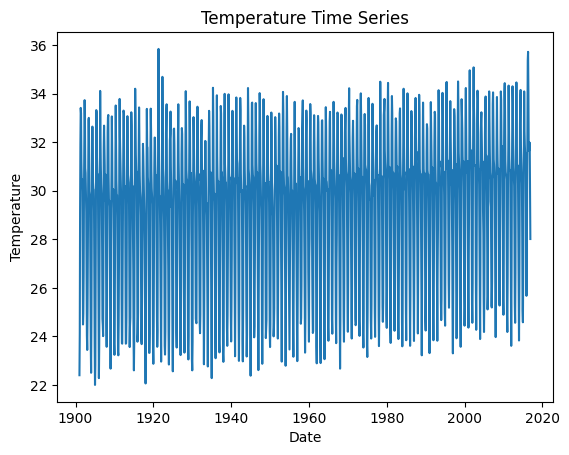

ADF Statistic: -1.3354865665409237
p-value: 0.6127849061366556
Critical Values:
	1%: -3.435139190725917
	5%: -2.8636550704859007
	10%: -2.5678960623995417


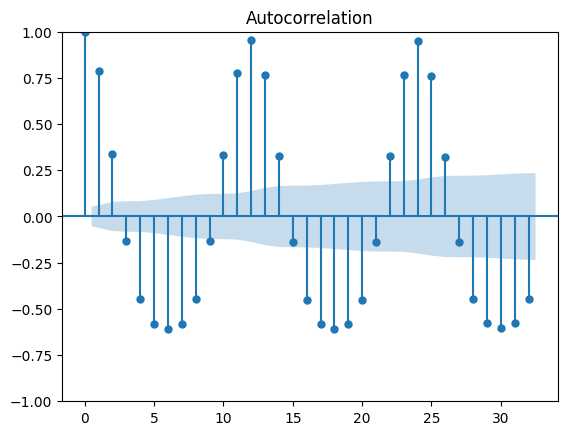

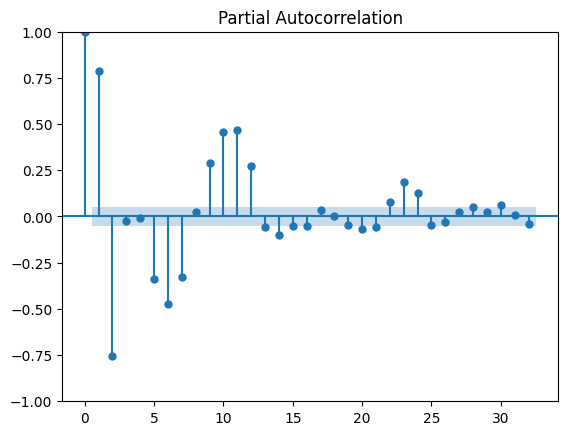

RMSE: 0.8589747826144247


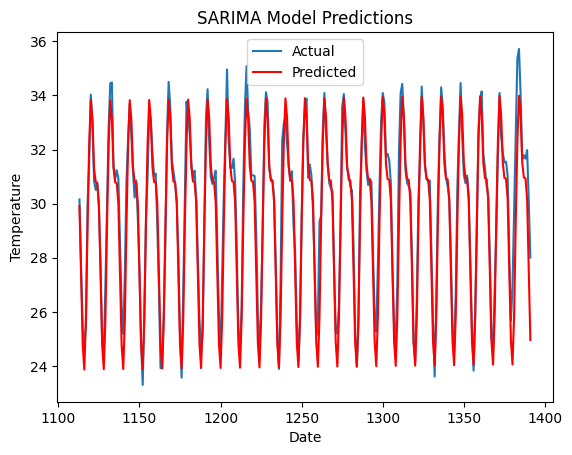

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.metrics import mean_squared_error

data = pd.read_csv('Temperature.csv')
data['date'] = pd.to_datetime(data['date'])

plt.plot(data['date'], data['temp'])
plt.xlabel('Date')
plt.ylabel('Temperature')
plt.title('Temperature Time Series')
plt.show()

def check_stationarity(timeseries):
    # Perform Dickey-Fuller test
    result = adfuller(timeseries)
    print('ADF Statistic:', result[0])
    print('p-value:', result[1])
    print('Critical Values:')
    for key, value in result[4].items():
        print('\t{}: {}'.format(key, value))

check_stationarity(data['temp'])

plot_acf(data['temp'])
plt.show()
plot_pacf(data['temp'])
plt.show()

sarima_model = SARIMAX(data['temp'], order=(1, 1, 1), seasonal_order=(1, 1, 1, 12))
sarima_result = sarima_model.fit()

train_size = int(len(data) * 0.8)
train, test = data['temp'][:train_size], data['temp'][train_size:]

sarima_model = SARIMAX(train, order=(1, 1, 1), seasonal_order=(1, 1, 1, 12))
sarima_result = sarima_model.fit()

predictions = sarima_result.predict(start=len(train), end=len(train) + len(test) - 1, dynamic=False)

mse = mean_squared_error(test, predictions)
rmse = np.sqrt(mse)
print('RMSE:', rmse)

plt.plot(test.index, test, label='Actual')
plt.plot(test.index, predictions, color='red', label='Predicted')
plt.xlabel('Date')
plt.ylabel('Temperature')
plt.title('SARIMA Model Predictions')
plt.legend()
plt.show()